<h2><font color="#004D7F" size=6>Procesamiento de datos para MD (Parte I)</font></h2>



<h1><font color="#004D7F" size=5>Transformación de Datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Transformaciones](#section2)
    * [2.1. Escalamiento](#section21)
    * [2.2. Estandarización](#section22)
    * [2.3. Normalización](#section23)
    * [2.4. Binarización](#section24)
    * [2.5. Box-Cox](#section25)
    * [2.6. Yeo-Johnson](#section26)

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. Por otro lado, otros algoritmos pueden funcionar mejor si los datos se preparan de una manera específica, por ejemplo, los de tipo árbol que poseen atributos (características) de tipo nominal (si se posee una variable categórica como "tipo de vivienda" con valores casa, departamento, duplex, un árbol de decisión puede crear ramas basadas en esos valores), tendrán mejor comportamiento con atributos discretos, manejando mejor valores numéricos. La recomendación es convertir los atributos categóricos en valores numéricos binarios. Esto se hace creando variables dummy (o codificación one-hot). Por tanto, es de vital importancia realizar un preprocesamiento a nuestro datos como parte fundamental de realizar un proyecto de machine learning.

### **Tratamiento de Datos:**

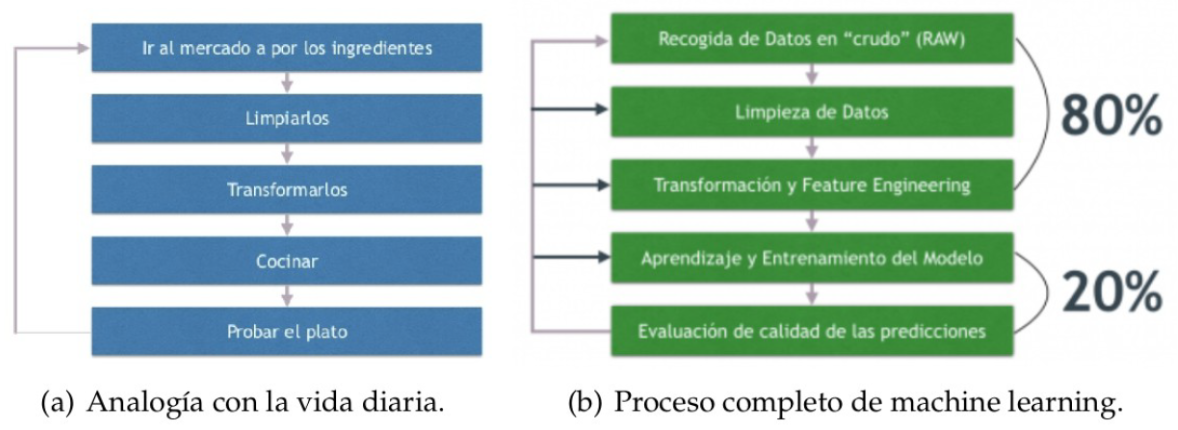

### **Necesidad de Preprocesamiento:**

Cuando tengamos mucha varianza en los diferentes atributos de un conjunto de datos. Por ejemplo: Edad tiene 2 dígitos y sueldo 5 o más dígitos. El modelo le otorgará más importancia a salario que a edad. Por lo tanto, debemos unificar las diferentes variables.

Problema empírico → necesidad de probar diferentes transformaciones de datos.

Algunas reglas generales:

– Los métodos basados en instancias son más efectivos si los atributos de entrada tienen la misma escala (como K-NN o SVM dependen de medidas de similaridad, por lo que es crucial que los atributos estén en la misma escala para que las distancias sean comparables).

– Los métodos de regresión pueden funcionar mejor si los atributos de entrada están estandarizados (métodos de regresión lineal, logística, ridge, lasso, etc..., pueden beneficiarse de la estandarización de las características para que cada una tenga un impacto similar en el modelo).

Los métodos basados en instancias (también llamados "instance-based learning" o "lazy learning") son una clase de algoritmos de aprendizaje automático que almacenan ejemplos de datos de entrenamiento y posponen el proceso de generalización (habilidad del modelo para funcionar bien con nuevos datos, no solo con los datos de entrenamiento) hasta que se necesita realizar una predicción. Los métodos basados en instancias generan predicciones comparando nuevas instancias con ejemplos previamente almacenados.

Los métodos basados en modelos como regresión o redes neuronales, crean un modelo global a partir de los datos. Un modelo global es aquel que resume la relación entre los datos de entrada y salida mediante una función general o ecuación. Este tipo de modelos busca encontrar una representación única que sea válida para todo el conjunto de datos. La idea detrás de un modelo global es que, una vez entrenado, puede predecir los valores de salida para cualquier nuevo dato sin necesidad de almacenar ejemplos individuales.

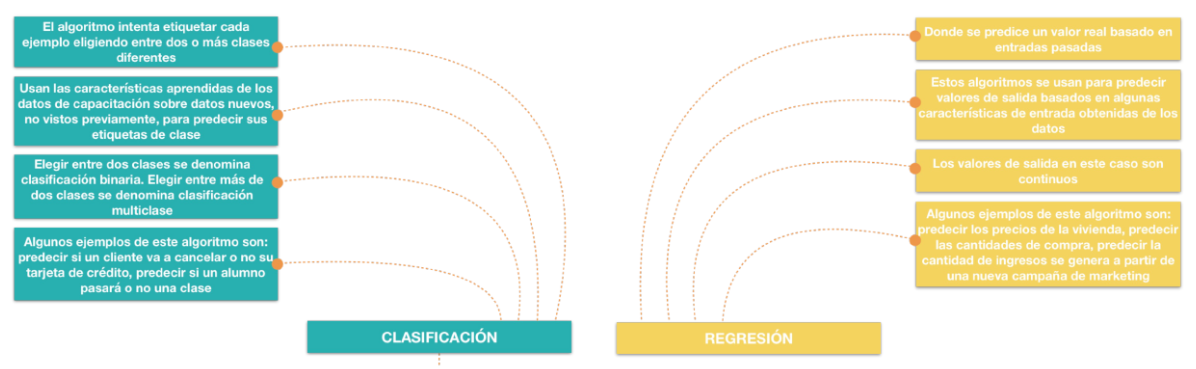

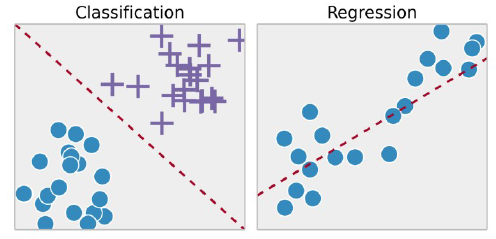

La Regresión es para valores numéricos, dentro del rango de valores que puede tomar pueden haber infinitos resultados, mientras que la Clasificación es para variables categóricas, los valores que puede tomar el resultado pertenece a los Naturales (por ejemplo, 7 números del 1 al 7).

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Para esta práctica vamos a cargar el conjunto de datos de Pima Indian Diabetes y trabajar diferentes tipos de transformaciones de datos. Así mismo, en algunas de ellas vamos a trabajar otros conjuntos de datos para ver un mejor impacto en su transformación.

Por otro lado, en cuanto a las librerías, vamos a ver llamarlas según cada transformación. Tenga en cuenta que estas transformaciones vamos a trabajarlas con la librería **Scikit-learn**.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ruta = 'data/pima-indians-diabetes.csv'

nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(ruta, names=nombres)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.00,50,1
1,1,85,66,29,0,26.6,351.00,31,0
2,8,183,64,0,0,23.3,672.00,32,1
3,1,89,66,23,94,28.1,167.00,21,0
4,0,137,40,35,168,43.1,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1


In [63]:
df.values

array([[  6., 148.,  72., ..., 627.,  50.,   1.],
       [  1.,  85.,  66., ..., 351.,  31.,   0.],
       [  8., 183.,  64., ..., 672.,  32.,   1.],
       ...,
       [  5., 121.,  72., ..., 245.,  30.,   0.],
       [  1., 126.,  60., ..., 349.,  47.,   1.],
       [  1.,  93.,  70., ..., 315.,  23.,   0.]])

In [65]:
array = df.values

In [67]:
X = array[:, 0:8]
X

array([[  6. , 148. ,  72. , ...,  33.6, 627. ,  50. ],
       [  1. ,  85. ,  66. , ...,  26.6, 351. ,  31. ],
       [  8. , 183. ,  64. , ...,  23.3, 672. ,  32. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2, 245. ,  30. ],
       [  1. , 126. ,  60. , ...,  30.1, 349. ,  47. ],
       [  1. ,  93. ,  70. , ...,  30.4, 315. ,  23. ]])

In [69]:
Y = array[:, 8]
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

<a id="section2"></a>
## <font color="#004D7F"> 2. Transformaciones</font>

El método de ajuste y transformación múltiple es el enfoque preferido. Llama a la función `fit()` para preparar los parámetros de la transformación una vez en sus datos (en este paso, el método "aprende" los parámetros de transformación basados en los datos de entrada, por ejemplo, en un escalado de datos, el método aprenderá el promedio y la desviación estándar de cada característica para poder escalar los datos correctamente). Luego, puede usar la función `transform()` (realiza la transformación real en los datos como escalar, normalizar, o codificar los datos una vez que el método ha "aprendido" los parámetros con `fit()`) en los mismos datos para prepararlos para el modelado y posteriormente en el conjunto de datos de prueba o validación o en nuevos datos que pueda haber en el futuro (no debes volver a ajustar los parámetros con `fit()` usando los datos de prueba, ya que esto podría generar un modelo con "trampa", que ya ha visto el resultado de esos datos, directamente utilizas en ellos `transform()`). 

El ajuste y transformación combinados se puede usar para tareas únicas y se utilizará la función `fit_transform()`. Es útil cuando solo quieres procesar los datos una vez, generalmente en el conjunto de entrenamiento o en tareas de preprocesamiento y no necesitas usar los mismos parámetros para datos futuros (como datos de prueba o nuevos datos) o si estás preparando los datos para visualización, análisis exploratorio o resúmenes.

### **Métodos de Transformación:**

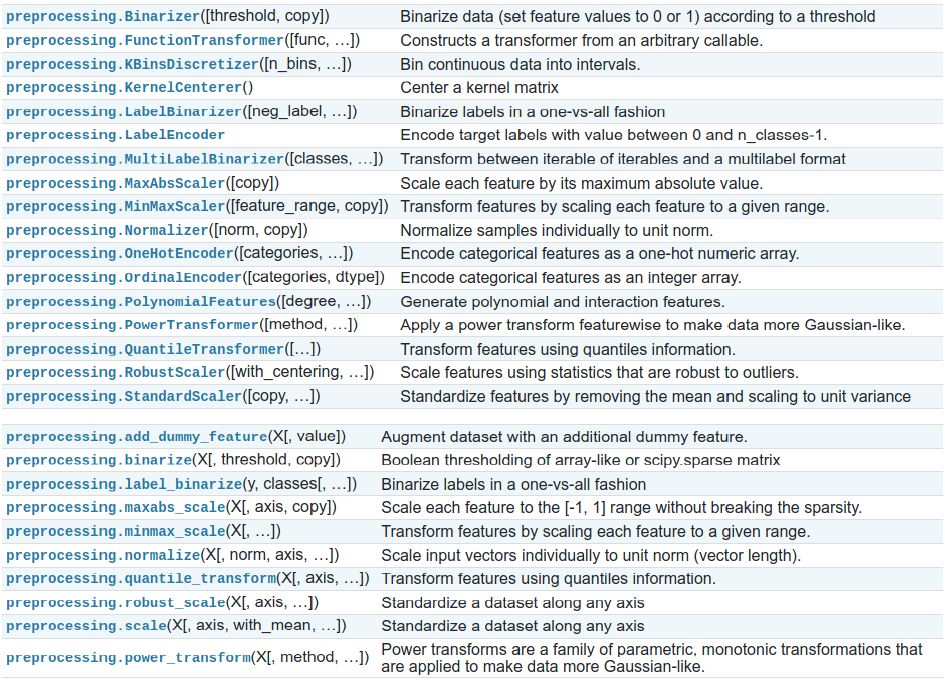

Puede revisar el paquete [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) de Python. Como puede verse existe una gran cantidad de funciones que podemos aplicar en esta fase de preprocesamiento según la necesidad de nuestros datos.

Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparlos con cada transformación.

<Axes: xlabel='class', ylabel='Density'>

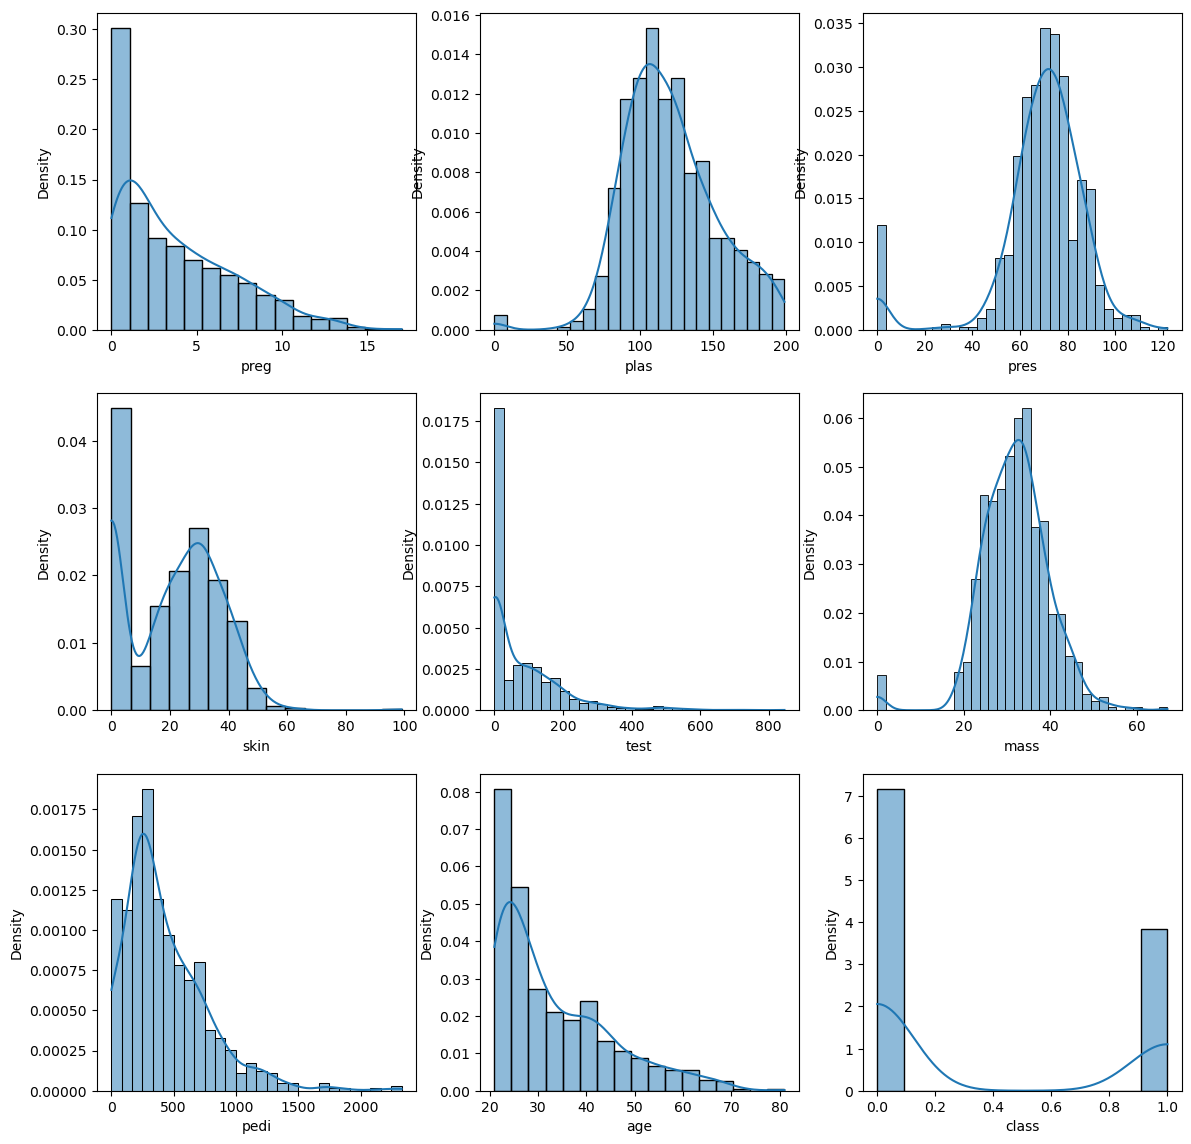

In [71]:
f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(df['preg'], ax=ax[0,0], kde=True, stat='density')
sns.histplot(df['plas'], ax=ax[0,1], kde=True, stat='density')
sns.histplot(df['pres'], ax=ax[0,2], kde=True, stat='density')
sns.histplot(df['skin'], ax=ax[1,0], kde=True, stat='density')
sns.histplot(df['test'], ax=ax[1,1], kde=True, stat='density')
sns.histplot(df['mass'], ax=ax[1,2], kde=True, stat='density')
sns.histplot(df['pedi'], ax=ax[2,0], kde=True, stat='density')
sns.histplot(df['age'], ax=ax[2,1], kde=True, stat='density')
sns.histplot(df['class'], ax=ax[2,2], kde=True, stat='density')

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Escalamiento</font>

Como se mencionó en la introducción, esta transformación es útil para los algoritmos de instancia, entre otros, principalmente aquellos que usan medidas de distancia como _k_-Nearest Neighbours o Support Vector Machine. Puede reescalar sus datos usando la clase [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

Después de reescalar puede ver que todos los valores están en el rango $[0,1]$,

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

np.set_printoptions(precision=3)

print(nombres)
print(rescaledX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.353 0.744 0.59  0.354 0.    0.501 0.269 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.151 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.289 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.072 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.982 0.2  ]]


In [75]:
# Si deseamos observar este array de Numpy en un DF de Pandas
import pandas as pd

transf_df = pd.DataFrame(rescaledX, columns=nombres[:-1])
transf_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.269183,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.150672,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.288505,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.071665,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.982395,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.073382,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.000103,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.105157,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.149813,0.433333


<Axes: xlabel='age', ylabel='Density'>

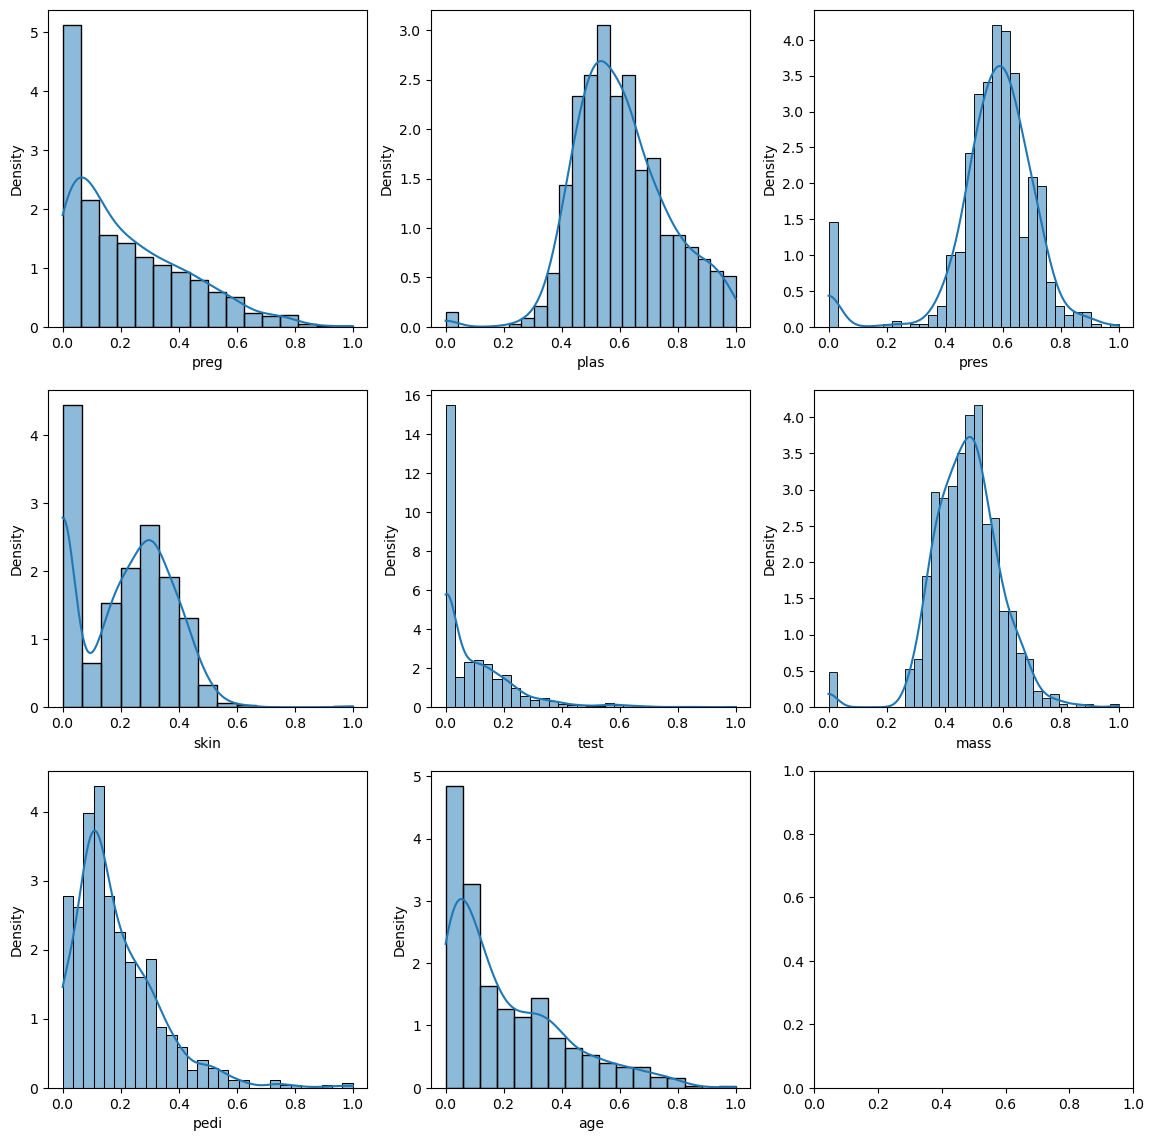

In [77]:
f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(transf_df['preg'], ax=ax[0,0], kde=True, stat='density')
sns.histplot(transf_df['plas'], ax=ax[0,1], kde=True, stat='density')
sns.histplot(transf_df['pres'], ax=ax[0,2], kde=True, stat='density')
sns.histplot(transf_df['skin'], ax=ax[1,0], kde=True, stat='density')
sns.histplot(transf_df['test'], ax=ax[1,1], kde=True, stat='density')
sns.histplot(transf_df['mass'], ax=ax[1,2], kde=True, stat='density')
sns.histplot(transf_df['pedi'], ax=ax[2,0], kde=True, stat='density')
sns.histplot(transf_df['age'], ax=ax[2,1], kde=True, stat='density')

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Estandarización</font>

Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada, como Linear Regression, Logistic Regression, RIDGE, LASSO, etc.... Puede estandarizar datos utilizando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Los valores para cada atributo ahora tienen un valor medio de $0$ y una desviación estándar de $1$

In [79]:
# Debemos compilar nuevamente las primeras celdas de código

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ruta = 'data/pima-indians-diabetes.csv'

nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(ruta, names=nombres)

X = array[:, 0:8]
Y = array[:, 8]

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

np.set_printoptions(precision=3)

print(nombres)
print(rescaledX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.584  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.227 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.716 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.768 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.466 -0.02 ]]


In [83]:
# Si deseamos observar este array de Numpy en un DF de Pandas
import pandas as pd

transf_df = pd.DataFrame(rescaledX, columns=nombres[:-1])
transf_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.584149,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.226986,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.716400,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.767743,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.465654,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.755987,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-1.257539,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.538509,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.232864,1.170732


<Axes: xlabel='age', ylabel='Density'>

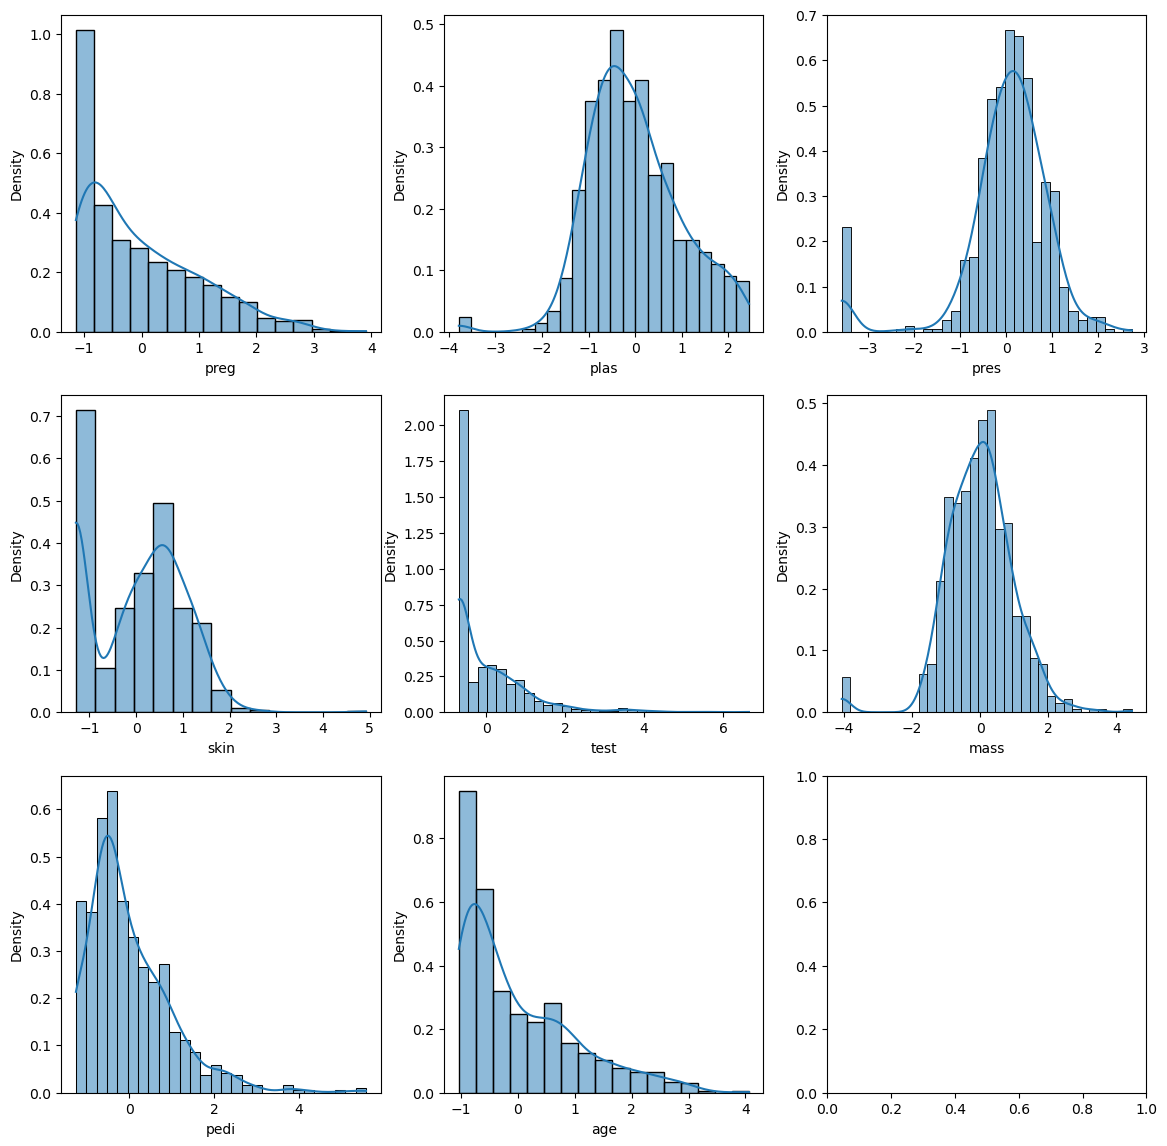

In [85]:
f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(transf_df['preg'], ax=ax[0,0], kde=True, stat='density')
sns.histplot(transf_df['plas'], ax=ax[0,1], kde=True, stat='density')
sns.histplot(transf_df['pres'], ax=ax[0,2], kde=True, stat='density')
sns.histplot(transf_df['skin'], ax=ax[1,0], kde=True, stat='density')
sns.histplot(transf_df['test'], ax=ax[1,1], kde=True, stat='density')
sns.histplot(transf_df['mass'], ax=ax[1,2], kde=True, stat='density')
sns.histplot(transf_df['pedi'], ax=ax[2,0], kde=True, stat='density')
sns.histplot(transf_df['age'], ax=ax[2,1], kde=True, stat='density')

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalización</font>

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

Normalizar en el contexto de machine learning puede referirse a dos cosas diferentes dependiendo del contexto:

**Escalado al intervalo [0, 1]:** En este contexto, normalizar puede ser sinónimo de escalar utilizando el método de Min-Max Scaler.

**Normalización por norma:** Significa ajustar las muestras (filas de un dataset) de modo que la longitud (norma) del vector sea 1. Es útil cuando la magnitud de las características no es relevante y lo importante es la dirección.

Puede normalizar datos en Python con la clase [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). En este caso estaremos normalizando por norma, por lo cual las filas están normalizadas a la longitud $1$

**Norma:**

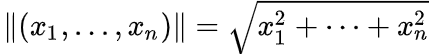

In [87]:
# Debemos compilar nuevamente las primeras celdas de código

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ruta = 'data/pima-indians-diabetes.csv'

nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(ruta, names=nombres)

X = array[:, 0:8]
Y = array[:, 8]

In [89]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

np.set_printoptions(precision=3)

print(nombres)
print(normalizedX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.009 0.227 0.11  0.054 0.    0.052 0.962 0.077]
 [0.003 0.229 0.178 0.078 0.    0.072 0.947 0.084]
 [0.011 0.261 0.091 0.    0.    0.033 0.959 0.046]
 [0.004 0.395 0.293 0.102 0.417 0.125 0.741 0.093]
 [0.    0.06  0.017 0.015 0.073 0.019 0.995 0.014]]


In [91]:
# Si deseamos observar este array de Numpy en un DF de Pandas
import pandas as pd

transf_df = pd.DataFrame(normalizedX, columns=nombres[:-1])
transf_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.009202,0.226993,0.110429,0.053681,0.000000,0.051534,0.961653,0.076687
1,0.002699,0.229401,0.178123,0.078266,0.000000,0.071789,0.947291,0.083664
2,0.011419,0.261215,0.091354,0.000000,0.000000,0.033259,0.959217,0.045677
3,0.004438,0.395019,0.292935,0.102084,0.417211,0.124719,0.741216,0.093207
4,0.000000,0.059578,0.017395,0.015221,0.073059,0.018743,0.994998,0.014351
...,...,...,...,...,...,...,...,...
763,0.034285,0.346278,0.260565,0.164568,0.617128,0.112797,0.586272,0.215995
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.016262,0.393541,0.234173,0.074805,0.364270,0.085213,0.796840,0.097572
766,0.002632,0.331587,0.157899,0.000000,0.000000,0.079212,0.918443,0.123687


<Axes: xlabel='age', ylabel='Density'>

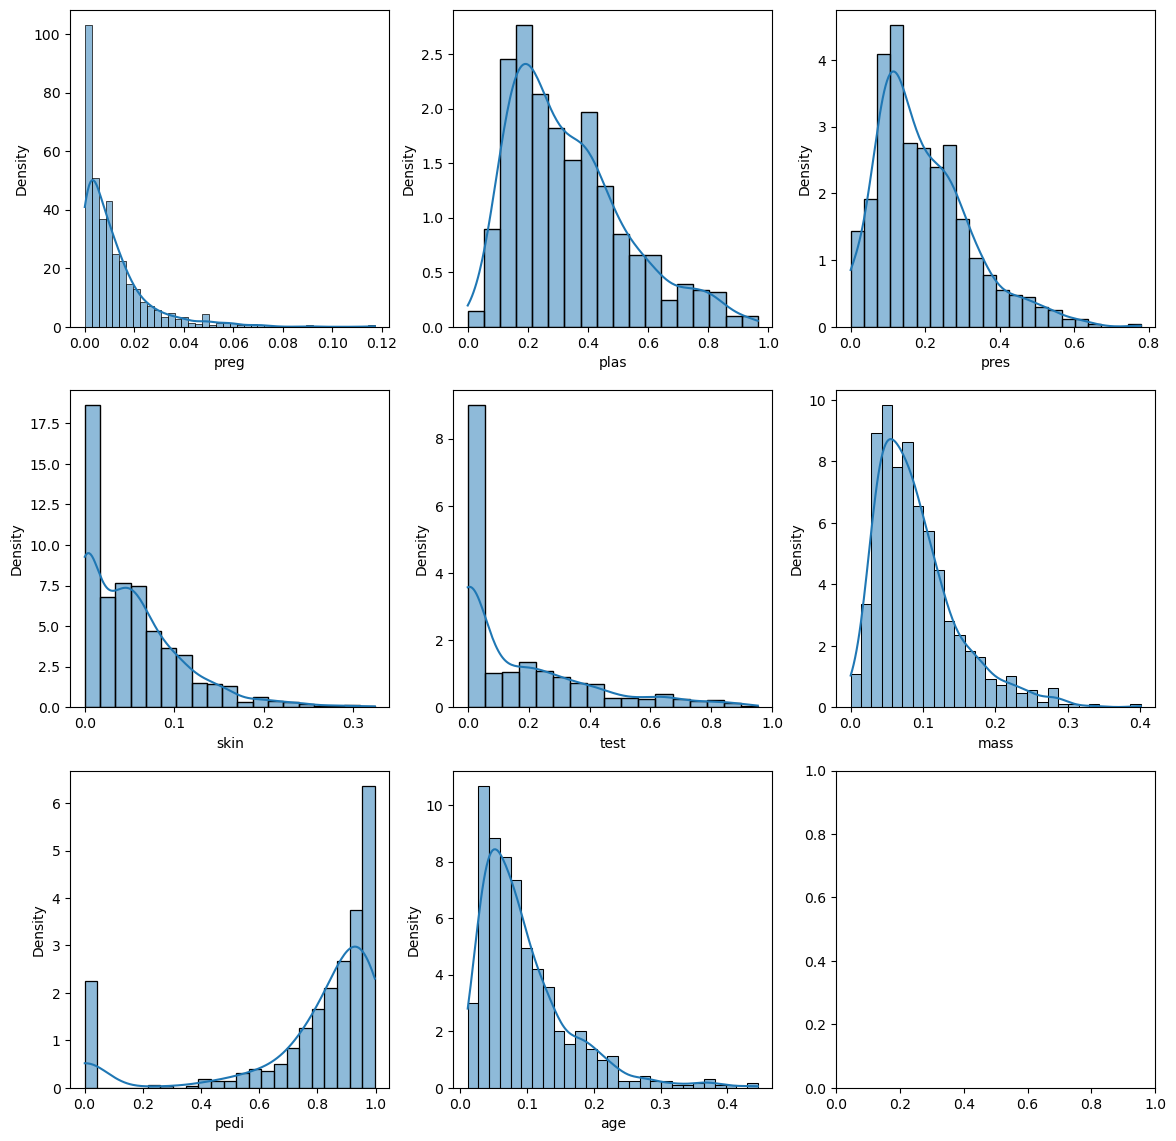

In [93]:
f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(transf_df['preg'], ax=ax[0,0], kde=True, stat='density')
sns.histplot(transf_df['plas'], ax=ax[0,1], kde=True, stat='density')
sns.histplot(transf_df['pres'], ax=ax[0,2], kde=True, stat='density')
sns.histplot(transf_df['skin'], ax=ax[1,0], kde=True, stat='density')
sns.histplot(transf_df['test'], ax=ax[1,1], kde=True, stat='density')
sns.histplot(transf_df['mass'], ax=ax[1,2], kde=True, stat='density')
sns.histplot(transf_df['pedi'], ax=ax[2,0], kde=True, stat='density')
sns.histplot(transf_df['age'], ax=ax[2,1], kde=True, stat='density')

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarización</font>

Puede crear nuevos atributos binarios en Python usando la clase [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html). Puede ver que todos los valores iguales o menores que 0 están marcados con 0 y todos los que están por encima de 0 están marcados con 1.

In [95]:
# Debemos compilar nuevamente las primeras celdas de código

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ruta = 'data/pima-indians-diabetes.csv'

nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(ruta, names=nombres)

X = array[:, 0:8]
Y = array[:, 8]

In [97]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer().fit(X)
binarizerX = binarizer.transform(X)

np.set_printoptions(precision=3)

print(nombres)
print(binarizerX[0:5, :])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [99]:
# Si deseamos observar este array de Numpy en un DF de Pandas
import pandas as pd

transf_df = pd.DataFrame(binarizerX, columns=nombres[:-1])
transf_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
763,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
764,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
765,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
766,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


<Axes: xlabel='age', ylabel='Density'>

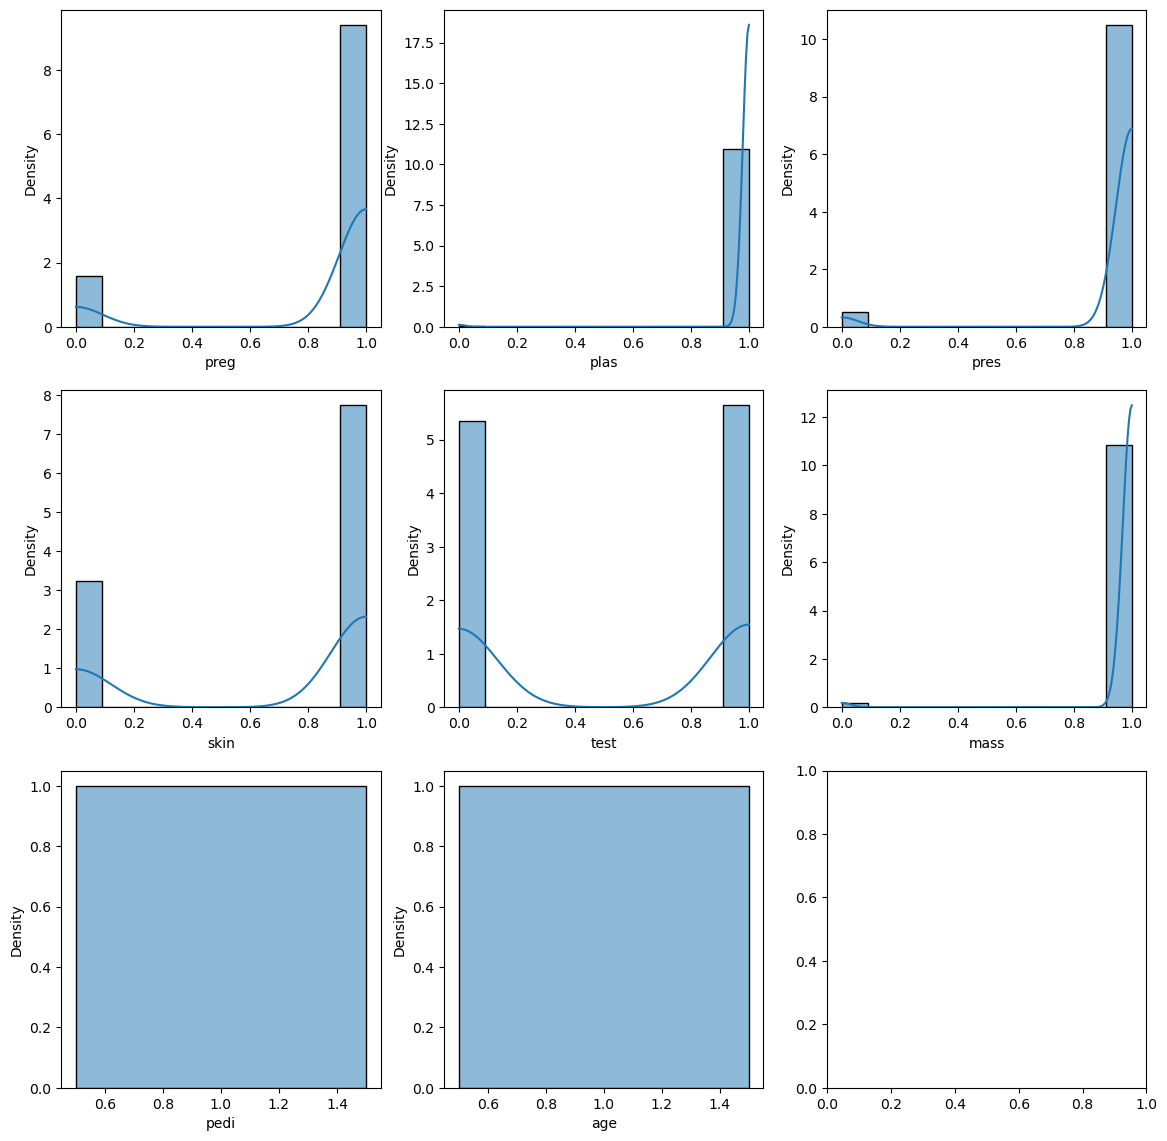

In [101]:
f, ax = plt.subplots(3, 3, figsize=(14,14))

sns.histplot(transf_df['preg'], ax=ax[0,0], kde=True, stat='density')
sns.histplot(transf_df['plas'], ax=ax[0,1], kde=True, stat='density')
sns.histplot(transf_df['pres'], ax=ax[0,2], kde=True, stat='density')
sns.histplot(transf_df['skin'], ax=ax[1,0], kde=True, stat='density')
sns.histplot(transf_df['test'], ax=ax[1,1], kde=True, stat='density')
sns.histplot(transf_df['mass'], ax=ax[1,2], kde=True, stat='density')
sns.histplot(transf_df['pedi'], ax=ax[2,0], kde=True, stat='density')
sns.histplot(transf_df['age'], ax=ax[2,1], kde=True, stat='density')

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>